俗话说"文不如表，表不如图"。对数据记性可视化分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl # 用于修改x轴的坐标
%matplotlib inline

In [2]:
# 1. 电影评分最高top10

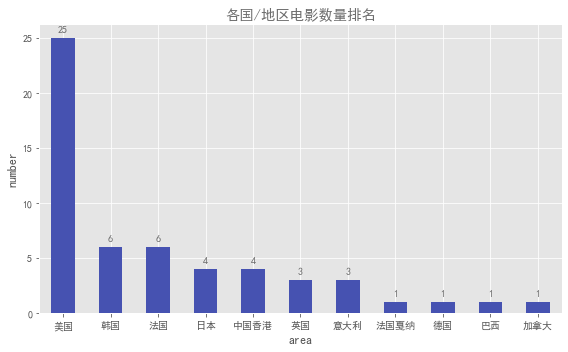

In [7]:
# 设置图片大小
fig = plt.figure(figsize=(8, 5))

# 设置绘图风格，默认风格比较难看
plt.style.use('ggplot')

# 改变配置
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

# 设置图表title、text标注的颜色
colors1 = '#6D6D6D'

# 设置表头
columns = ['index', 'thumb', 'name', 'star', 'time', 'area', 'score']

df = pd.read_csv('./top100/data/猫眼top100.csv',
                 encoding='utf-8',
                 header=None,
                 names=columns,
                 index_col='index')
area_count = df.groupby(by='area').area.count().sort_values(ascending=False)

# 绘图方法1
area_count.plot.bar(color='#4652B1')
pl.xticks(rotation=0)  # x轴名称太长，重叠，旋转为纵向

# 绘制方法2
# plt.bar(range(11),area_count.values,tick_label=area_count.index,color='#4652B1')

# 添加文字标注
for x, y in enumerate(list(area_count.values)):
    # print(x,y)
    plt.text(x, y + 0.5, '%s' % round(y, 1), ha='center', color=colors1)

# 设置标题，x,y轴的标签
plt.title("各国/地区电影数量排名", color=colors1)

plt.xlabel("area")
plt.ylabel("number")

plt.tight_layout()

plt.show()

# 2.各国家的电影数量比较

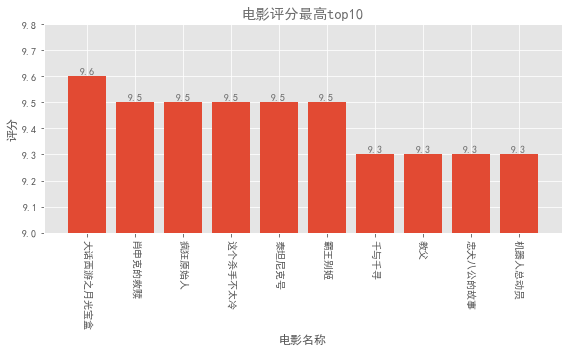

In [5]:
# 设置绘图风格，默认风格比较难看
plt.style.use('ggplot')

# 改变配置
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

# 设置图片大小
fig = plt.figure(figsize=(8, 5))

# 设置图表title、text标注的颜色
colors1 = '#6D6D6D'

# 设置表头
columns = ['index', 'thumb', 'name', 'star', 'time', 'area', 'score']

# 打开表格 将索引设为index
df = pd.read_csv('./top100/data/猫眼top100.csv',
                 encoding='utf-8',
                 header=None,
                 names=columns,
                 index_col='index')
# 按得分进行降序
df_score = df.sort_values('score', ascending=False)

# x轴坐标
name1 = df_score.name[:10]

# y轴坐标
score1 = df_score.score[:10]

# 绘制条形图 用range() 能保证x轴的正确顺序
plt.bar(range(10), score1, tick_label=name1)

# 设置y轴的范围
plt.ylim(9, 9.8)

# 设置标题
plt.title('电影评分最高top10', color=colors1)

# 设置x,y轴标题
plt.xlabel('电影名称')
plt.ylabel('评分')

# 为每个条形图添加数值标签
for x, y in enumerate(list(score1)):
    #     print(x,y)
    plt.text(x, y + 0.01, '%s' % round(y, 1), ha='center', color=colors1)

# x轴名称太长发生重叠，旋转为纵向显示
plt.xticks(rotation=270)

# 自动控制空白边缘，已全部显示x轴名称
plt.tight_layout()

plt.show()

# 3.电影作品集中的年份

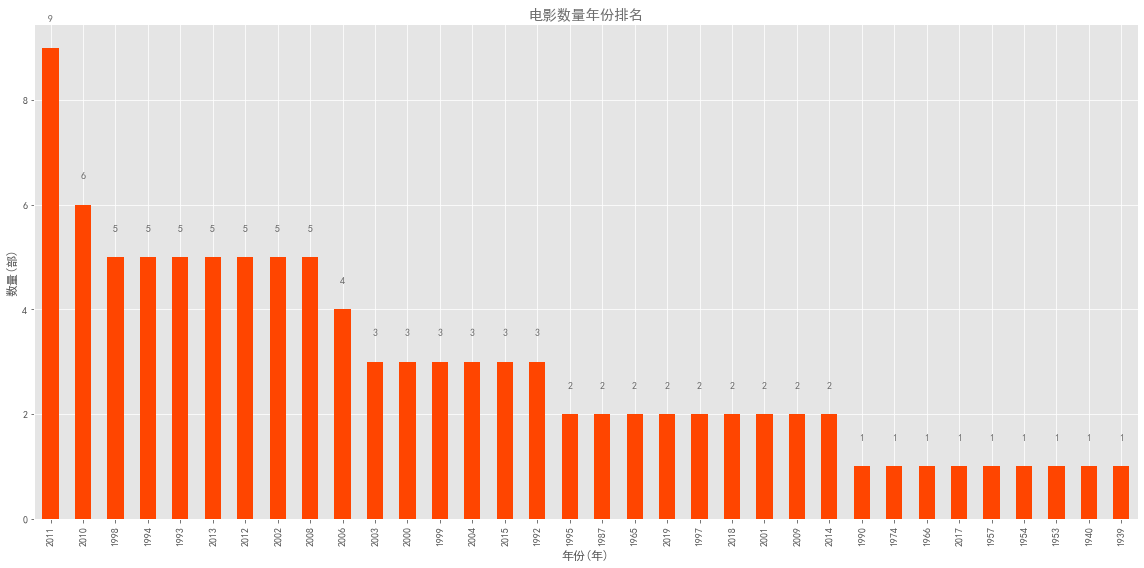

In [8]:
# 设置图片大小
fig = plt.figure(figsize=(16, 8))

# 从日期中提取年份
df['year'] = df['time'].map(lambda x: x.split('-')[0])

# 统计各年上映的电影数量
group_year = df.groupby('year')
group_year_amount = group_year.year.count()
top_year = group_year_amount.sort_values(ascending=False)

# 绘图
top_year.plot(kind='bar', color='orangered')

# 文字提示
for x, y in enumerate(list(top_year.values)):
    plt.text(x, y + 0.5, '%s' % round(y, 1), ha='center', color=colors1)

# 设置标题
plt.title('电影数量年份排名', color=colors1)

# 设置 x,y轴的标签
plt.xlabel('年份(年)')
plt.ylabel('数量(部)')

plt.tight_layout()

plt.show()

# 4.拥有电影作品数量最多的演员

<BarContainer object of 10 artists>

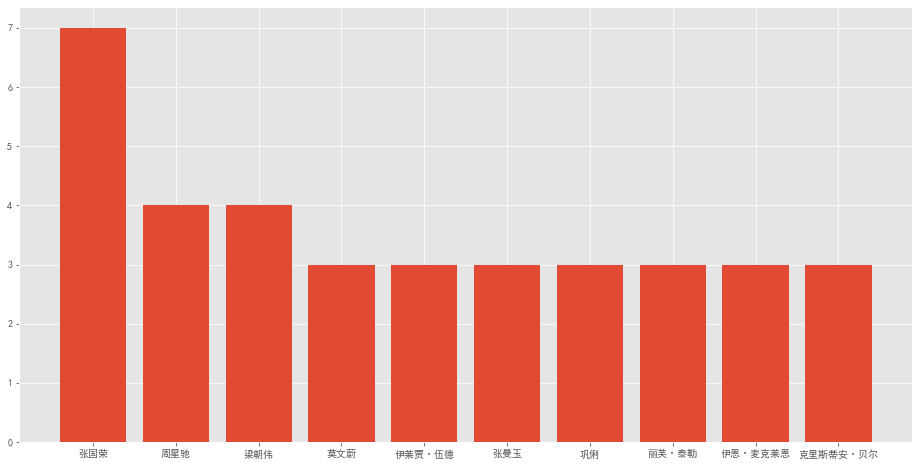

In [9]:
# 设置绘图风格，默认风格比较难看
plt.style.use('ggplot')

# 改变配置
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

fig = plt.figure(figsize=(16,8))

# 提取演员
starlist = []
star_total = df.star
for i in df.star.str.replace(' ','').str.split(','):
    starlist.extend(i)

# print(starlist)
# 去除重复的演员 
starall = set(starlist)

starall2 = {}
for i in starall:
    if starlist.count(i) > 1:
        # 筛选出电影数量超过1部的演员
        starall2[i] = starlist.count(i)
        
# 进行排序操作
starall2 = sorted(starall2.items(),key=lambda starlist:starlist[1],reverse=True)

# 将元祖转为字典格式
starall2= dict(starall2[:10])

# 绘图
x_star = list(starall2.keys())
y_star = list(starall2.values())
plt.bar(range(10),y_star,tick_label=x_star)

# plt.show()